# Project 2: Binary Classification on ‘Customer_Churn’ using Keras

# Problem Statement: 
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.


# Customer_churn Dataset: 
The details regarding this ‘customer_churn’ dataset are present in the data dictionary:

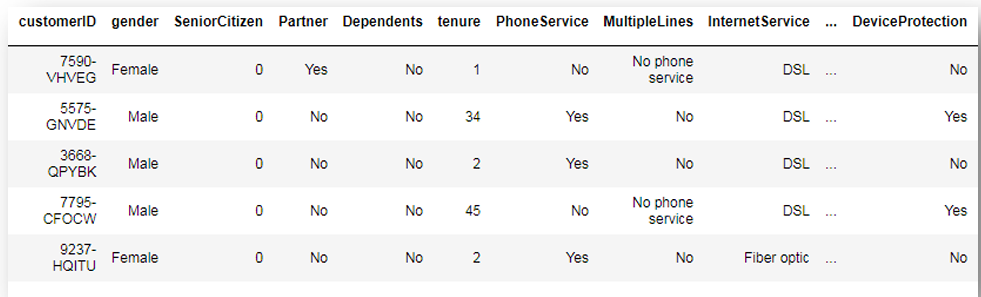



### Domain –Telecom

# Domain Context –  
Customer churn, in simple terms means that the customer has stopped doing business with the company and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive analysis to gauge the factors responsible for a customer to leave the company. These churn prediction models help in finding out the customer base that are most likely to churn out.

### Lab Environment: Jupyter Notebook

# Tasks to be done:

### A) Data Manipulation: 

a. Find the total number of male customers

b. Find the total number of customers whose Internet Service is ‘DSL’ 

c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’ 

d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’.

### B) Data Visualization: 
a. Build a pie-chart to show the distribution of customers would be churning out 
b. Build a bar-plot to show the distribution of ‘Internet Service’

### C) Model Building:

#### a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function. 

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function 

iii. Use ‘Adam’ as the optimization algorithm 

iv. Fit the model on the train set, with number of epochs to be 150 

v. Predict the values on the test set and build a confusion matrix 

vi. Plot the ‘Accuracy vs Epochs’ graph 


#### b. Build the 2nd model using same target and feature variables: 

i. Add a drop-out layer after the input layer with drop-out value of 0.3 

ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2 

iii. Predict the values on the test set and build a confusion matrix 

iv. Plot the ‘Accuracy vs Epochs’ graph


#### c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column: 

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function. 

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function 

iii. Use ‘Adam’ as the optimization algorithm 

iv. Fit the model on the train set, with number of epochs to be 150 

v. Predict the values on the test set and build a confusion matrix 

vi. Plot the ‘Accuracy vs Epochs’ graph

# 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


import warnings
warnings.filterwarnings("ignore")

C:\Users\raman\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# 2. Load Dataset

In [2]:
df = pd.read_csv(r"Downloads\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Descriptive Statistics

In [3]:
df.shape

(7043, 21)

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Missing Value Analysis
missing_val = df.isna().sum()
missing_val_Percent = (missing_val/len(df))*100
missing_val_analysis = {'missing_val': missing_val , 'missing_val_percentage': missing_val_Percent}
missing_val_analysis = pd.DataFrame(missing_val_analysis)
missing_val_analysis

,missing_val,missing_val_percentage
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


# Lets Start Solving the Tasks

# A) Data Manipulation:

### a. Find the total number of male customers

In [7]:
male_count = df[df['gender'] == 'Male'].shape[0]
print("Total male customers:", male_count)

Total male customers: 3555


### b. Find the total number of customers whose Internet Service is ‘DSL’

In [8]:
dsl_count = df[df['InternetService'] == 'DSL'].shape[0]
print("Total DSL customers:", dsl_count)

Total DSL customers: 2421


### c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’

In [9]:
new_customer = df[
    (df['gender'] == 'Female') &
    (df['SeniorCitizen'] == 1) &
    (df['PaymentMethod'] == 'Mailed check')
]

print("Shape of new_customer : ", new_customer.shape)

new_customer.head()

Shape of new_customer :  (50, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


### d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500usd &  store the result in ‘new_customer'. 

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

new_customer = df[
    (df['tenure'] < 10) |
    (df['TotalCharges'] < 500)
]

print("Shape of new_customer : ", new_customer.shape)

new_customer.head()

Shape of new_customer :  (2233, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


# B) Data Visualization: 

### a. Build a pie-chart to show the distribution of customers would be churning out

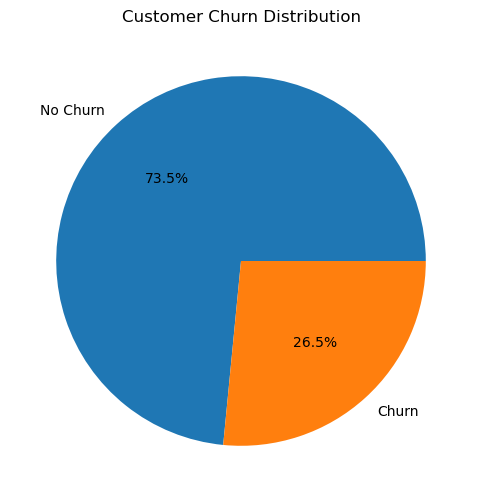

In [11]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['No Churn', 'Churn'],
    figsize=(6,6)
)
plt.title("Customer Churn Distribution")
plt.ylabel("")
plt.show()

Approximately 26.5% of customers have churned, indicating a substantial loss of customers and highlighting the importance of predictive modeling to improve customer retention.

### b. Build a bar-plot to show the distribution of ‘Internet Service’

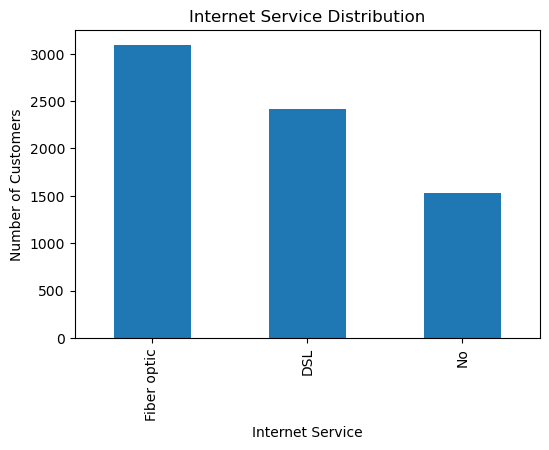

In [12]:
df['InternetService'].value_counts().plot(
    kind='bar',
    figsize=(6,4)
)
plt.title("Internet Service Distribution")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()

Fiber optic is the most widely used internet service, followed by DSL, while a smaller segment of customers do not subscribe to internet services.

# C) Model Building: 

### a. Build a sequential model using Keras, to find out if the customer would churn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

In [13]:
# Preprocessing
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')
df = df.dropna(subset=['tenure', 'Churn'])

In [14]:
#train test split

X = df[['tenure']].values.astype('float32')
y = df['Churn'].values.astype('float32')

scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
# model1 building
model1 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile the model
model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# training the model
history1 = model1.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, verbose=0)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Accuracy: 75.63%


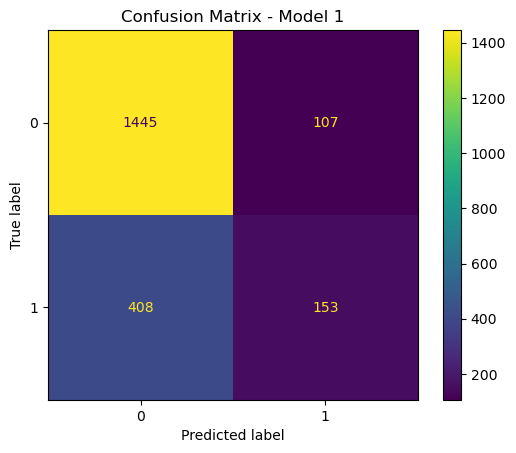

In [16]:
# Predictions & confusion matrix
y_pred1 = (model1.predict(X_test) > 0.5).astype(int)


# Lets Calculate Model Accuracy
test_accuracy1 = accuracy_score(y_test, y_pred1)
print("\nTest Accuracy: {:.2f}%".format(test_accuracy1 * 100))


# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm1).plot()
plt.title("Confusion Matrix - Model 1")
plt.show()

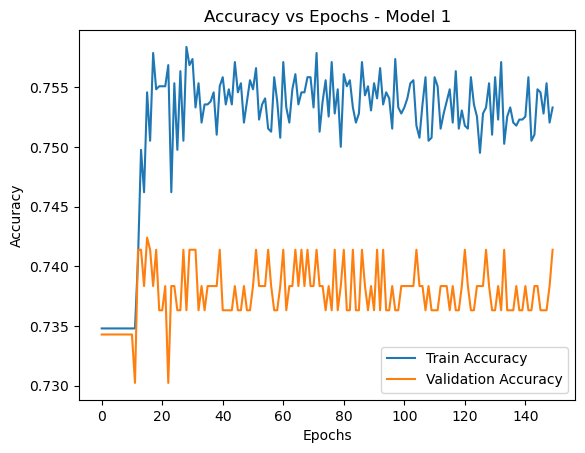

In [17]:
# Plot Accuracy vs epochs

plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs - Model 1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### b. Build the 2nd model using same target and feature variables:

i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii. Predict the values on the test set and build a confusion matrix

iv. Plot the ‘Accuracy vs Epochs’ graph

In [18]:
# Model 2 - with dropout, same feature
model2 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])



#compile the model
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# training the model
history2 = model2.fit(X_train, y_train, epochs=150, batch_size=128, validation_split=0.2, verbose=0)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Test Accuracy: 75.63%


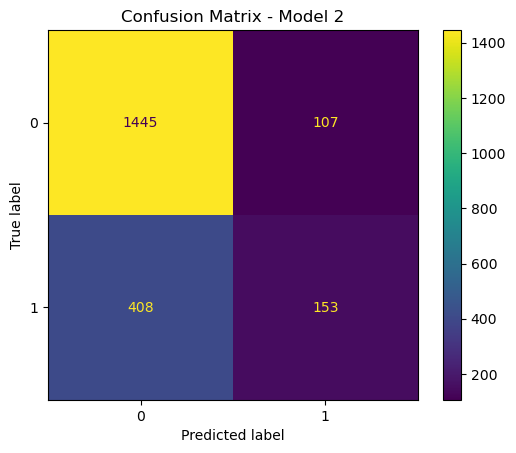

In [19]:
# Predictions & confusion matrix
y_pred2 = (model2.predict(X_test) > 0.5).astype(int)


# Lets Calculate Model Accuracy
test_accuracy2 = accuracy_score(y_test, y_pred2)
print("\nTest Accuracy: {:.2f}%".format(test_accuracy2 * 100))

# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm2).plot()
plt.title("Confusion Matrix - Model 2")
plt.show()

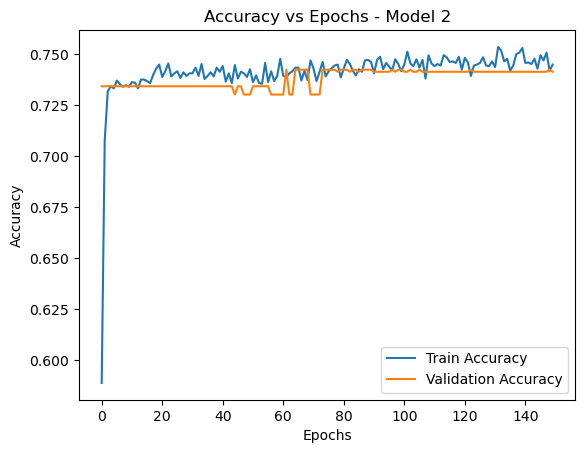

In [20]:
# Accuracy vs Epochs

plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs - Model 2")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

In [21]:
# Data Preparation

X3 = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y3 = df['Churn']

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42, stratify=y3)

In [22]:
# model1 building
model3 = Sequential([
    Dense(12, activation="relu", input_shape=(X3_train.shape[1],)),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])


# Compile the Model
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# Train the Model 
history3 = model3.fit(X3_train, y3_train, epochs=150, batch_size=64, validation_split=0.2, verbose=0)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Accuracy: 73.45%


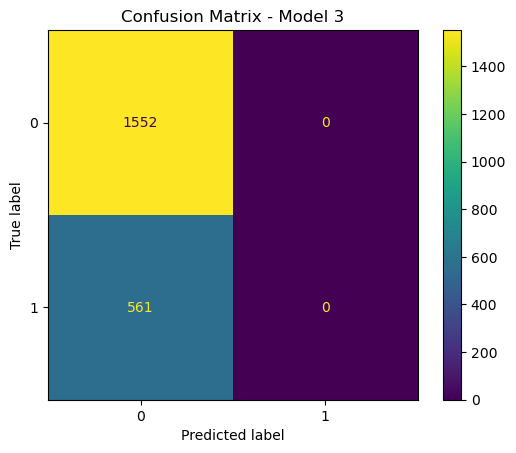

In [23]:
# Predictions & confusion matrix
y_pred3 = (model3.predict(X3_test) > 0.5).astype(int)


# Lets Calculate Model Accuracy
test_accuracy3 = accuracy_score(y3_test, y_pred3)
print("\nTest Accuracy: {:.2f}%".format(test_accuracy3 * 100))


# Confusion Matrix
cm3 = confusion_matrix(y3_test, y_pred3)
ConfusionMatrixDisplay(cm3).plot()
plt.title("Confusion Matrix - Model 3")
plt.show()

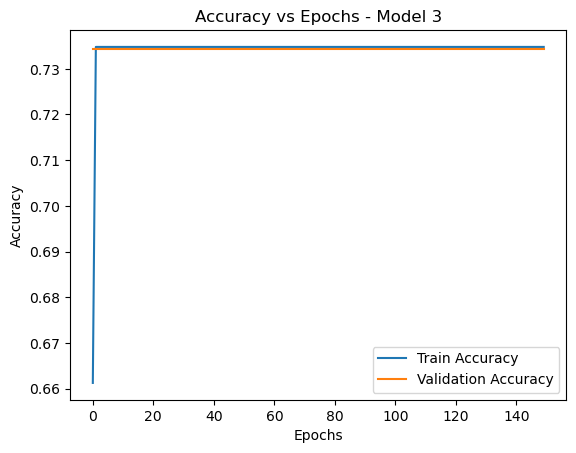

In [24]:
# Accuracy vs Epochs

plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs - Model 3")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()